# HW2
Xihao Cao



Importation

In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pwlf
import statsmodels.api as sm
from patsy import dmatrix
import sklearn.model_selection
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import scipy.stats
from sklearn.metrics import r2_score
import time
from sklearn.linear_model import Ridge,Lasso 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

## Part (1)
Sythesize a multimodal Gaussian distribution

Reference: https://www.programminghunter.com/article/3873197593/

200


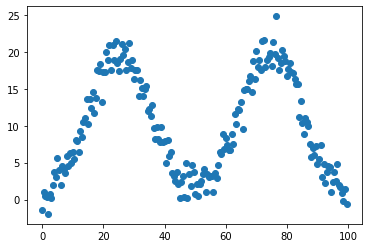

In [177]:
class DataMaker():
    def __init__(self,mu1,mu2,sigma1,sigma2):
        self.mu1 = mu1
        self.sigma1 = sigma1
        self.mu2 = mu2
        self.sigma2 = sigma2
    def make_y(self,x):
            mu1 = self.mu1
            sigma1 = self.sigma1
            mu2 = self.mu2
            sigma2 = self.sigma1
            N1 = np.sqrt(2 * np.pi * np.power(sigma1, 2))
            fac1 = np.power(x - mu1, 2) / np.power(sigma1, 2)
            density1=np.exp(-fac1/2)/N1

            N2 = np.sqrt(2 * np.pi * np.power(sigma2, 2))
            fac2 = np.power(x - mu2, 2) / np.power(sigma2, 2)
            density2=np.exp(-fac2/2)/N2
            #print(density1,density2)
            density=0.5*density2+0.5*density1
            return density


temp = DataMaker(25,75,10,10)

x = np.arange(0,100,0.5)
size = len(x)
print(size)

error = np.random.normal(0, 1.5, size)

y = temp.make_y(x) * 1000 + error

plt.plot(x,y,'o')

plt.show()


# Split the data into train, test set
train_x, valid_x, train_y, valid_y = train_test_split(x, y, test_size=0.3, random_state = 1)

In [178]:
# construct the F statistics function
def f_test(group1, group2):
    f = np.var(group1, ddof=1)/np.var(group2, ddof=1)
    nun = x.size-1
    dun = y.size-1
    p_value = 1-scipy.stats.f.cdf(f, nun, dun)
    return f, p_value

## Part(2)
Construct a piecewise linear regression

knots are  [17.51235452 -5.77338579]


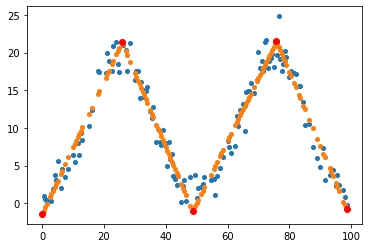

In [179]:
# initialize piecewise linear fit with your x and y data
my_pwlf = pwlf.PiecewiseLinFit(train_x, train_y)

# fit the data for four line segments
knots = my_pwlf.fit(4)

# predict for the determined points
train_yHat = my_pwlf.predict(train_x)
knotHats = my_pwlf.predict(knots)
print("knots are ", knotHat)

# plot the results, where the orange line is the predicted value
plt.figure()
plt.plot(train_x, train_y, 'o', markersize = 4)
plt.plot(train_x, train_yHat, 'o', markersize = 4)
plt.plot(knots, knotHats, "ro")
plt.show()

# evaluate the model accuracy
t1_yHat = my_pwlf.predict(valid_x)
resid1 = valid_y - t1_yHat
rmse1 = sqrt(mean_squared_error(valid_y, t1_yHat))
r2_1 = r2_score(valid_y, t1_yHat)

## Part(3)

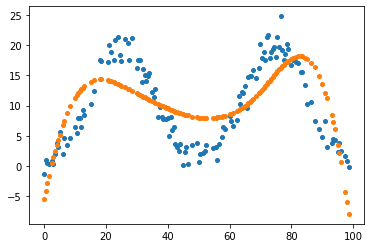

In [180]:
# First try 2 knots
basis_train_x = dmatrix("bs(train, knots=(25,70), degree=3, include_intercept=False)", {"train": train_x},return_type='dataframe')
basis_valid_x = dmatrix("bs(valid, knots=(25,70), degree=3, include_intercept=False)", {"valid": valid_x},return_type='dataframe')
fit1 = sm.GLM(train_y, basis_train_x).fit()


pred1 = fit1.predict(basis_train_x)
pred2 = fit1.predict(basis_valid_x)
resid2 = valid_y - pred2

plt.figure()
plt.plot(train_x, train_y, 'o', markersize = 4)
plt.plot(train_x, pred1, 'o', markersize = 4)

rmse2 = sqrt(mean_squared_error(valid_y, pred2))
r2_2 = r2_score(valid_y, pred2)

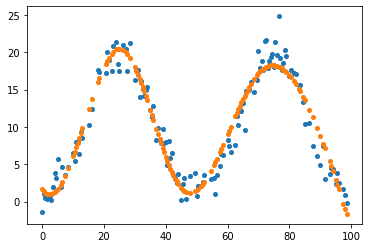

In [181]:
# try 3 knots
basis_train_x = dmatrix("bs(train, knots=(25, 45, 70), degree=3, include_intercept=False)", {"train": train_x},return_type='dataframe')
basis_valid_x = dmatrix("bs(valid, knots=(25, 45, 70), degree=3, include_intercept=False)", {"valid": valid_x},return_type='dataframe')
fit2 = sm.GLM(train_y, basis_train_x).fit()


pred1 = fit2.predict(basis_train_x)
pred2 = fit2.predict(basis_valid_x)
resid3 = valid_y - pred2

plt.figure()
plt.plot(train_x, train_y, 'o', markersize = 4)
plt.plot(train_x, pred1, 'o', markersize = 4)

rmse3 = sqrt(mean_squared_error(valid_y, pred2))
r2_3 = r2_score(valid_y, pred2)


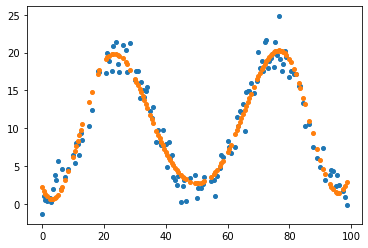

In [182]:
# try 4 knots
basis_train_x = dmatrix("bs(train, knots=(20, 40, 60, 80), degree=3, include_intercept=False)", {"train": train_x},return_type='dataframe')
basis_valid_x = dmatrix("bs(valid, knots=(20, 40, 60, 80), degree=3, include_intercept=False)", {"valid": valid_x},return_type='dataframe')
fit3 = sm.GLM(train_y, basis_train_x).fit()


pred1 = fit3.predict(basis_train_x)
pred2 = fit3.predict(basis_valid_x)
resid4 = valid_y - pred2

plt.figure()
plt.plot(train_x, train_y, 'o', markersize = 4)
plt.plot(train_x, pred1, 'o', markersize = 4)

rmse4 = sqrt(mean_squared_error(valid_y, pred2))
r2_4 = r2_score(valid_y, pred2)

By looking at the f statistics, we can see that the model with more knots has a better fitting ability than models
with less knots, however, increasing 2 knots to 3 knots has a stronger strength on improving the model than the one of increasing 3 knots to 4 knots

In [183]:
# use f test to compare how many knots to choose
two_three_knots = f_test(resid2, resid3)
print("two_three_knots: ", two_three_knots)
three_four_knots = f_test(resid3, resid4)
print("three_four_knots: ", three_four_knots)



two_three_knots:  (4.365646673143129, 1.1102230246251565e-16)
three_four_knots:  (1.3669482894029095, 0.013991425671777802)


## Part(4)

In [184]:
data = {"R2":[r2_1, r2_2, r2_3, r2_4],\
        "RMSE":[rmse1, rmse2, rmse3, rmse4]}
df =pd.DataFrame(data, index=["piecewise linear", "spline 2 knots", "spline 3 knots", "spline 4 knots"])
df

,R2,RMSE
piecewise linear,0.904778,1.983017
spline 2 knots,0.343096,5.208460
spline 3 knots,0.856596,2.433545
spline 4 knots,0.896298,2.069437


## Part(5)
I this part, I fit four polynomial models with degree 2,3,4,5 respectively and plot their fitting curve, as we can see
polynomial with higher degrees tends to fit better.

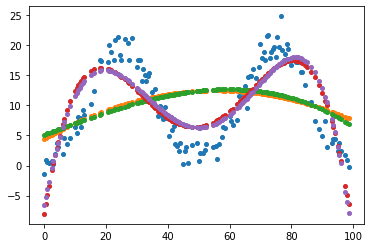

In [185]:
weights2 = np.polyfit(train_x, train_y, 2)
weights3 = np.polyfit(train_x, train_y, 3)
weights4 = np.polyfit(train_x, train_y, 4)
weights5 = np.polyfit(train_x, train_y, 5)

model2 = np.poly1d(weights2)
model3 = np.poly1d(weights3)
model4 = np.poly1d(weights4)
model5 = np.poly1d(weights5)

pred2 = model2(train_x)
pred3 = model3(train_x)
pred4 = model4(train_x)
pred5 = model5(train_x)

plt.plot(train_x, train_y, "o", markersize = 4)
plt.plot(train_x, pred2, "o", markersize = 4)
plt.plot(train_x, pred3, "o", markersize = 4)
plt.plot(train_x, pred4, "o", markersize = 4)
plt.plot(train_x, pred5, "o", markersize = 4)

## Part(6)

In [186]:
# task 2
start = time.time()
my_pwlf = pwlf.PiecewiseLinFit(train_x, train_y)
knots = my_pwlf.fit(4)
end = time.time()
t0 = end - start
print("task2 spends a time of", t0)

task2 spends a time of 0.21938776969909668


In [187]:
# task 3 2 knots
start = time.time()
basis_train_x = dmatrix("bs(train, knots=(25,70), degree=3, include_intercept=False)", {"train": train_x},return_type='dataframe')
fit1 = sm.GLM(train_y, basis_train_x).fit()
end = time.time()
t1 = end - start
print("task3 with 2 knots spends a time of", t1)


task3 with 2 knots spends a time of 0.0032548904418945312


In [188]:
# task 3 3 knots
start = time.time()
basis_train_x = dmatrix("bs(train, knots=(25, 45, 70), degree=3, include_intercept=False)", {"train": train_x},return_type='dataframe')
fit2 = sm.GLM(train_y, basis_train_x).fit()
end = time.time()
t2 = end - start
print("task3 with 3 knots spends a time of", t2)

task3 with 3 knots spends a time of 0.002975940704345703


In [189]:
# task 3 4 knots
start = time.time()
basis_train_x = dmatrix("bs(train, knots=(20, 40, 60, 80), degree=3, include_intercept=False)", {"train": train_x},return_type='dataframe')
fit3 = sm.GLM(train_y, basis_train_x).fit()
end = time.time()
t3 = end - start
print("task3 with 4 knots spends a time of", t3)

task3 with 4 knots spends a time of 0.0031120777130126953


In [190]:
# task 5 with degree of 5
start = time.time()
weights5 = np.polyfit(train_x, train_y, 5)
model5 = np.poly1d(weights5)
end = time.time()
t4 = end - start
print("task5 with degree 5 spends a time of", t4)

task5 with degree 5 spends a time of 0.0002980232238769531


In [191]:
time = {"time" : [t0, t1, t2, t3, t4]}
time = pd.DataFrame(time, index = ["task2", "task3 with 2 knots",\
                                   "task3 with 3 knots", "task3 with 4 knots", "task5 with degree 5"])
time

,time
task2,0.219388
task3 with 2 knots,0.003255
task3 with 3 knots,0.002976
task3 with 4 knots,0.003112
task5 with degree 5,0.000298


## Part(7)
reference: https://www.kirenz.com/post/2021-12-06-regression-splines-in-python/regression-splines-in-python/

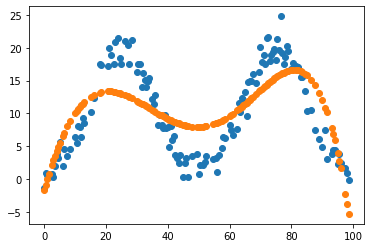

In [192]:
def LassoRegression(degree, alpha):
    return Pipeline([("poly", PolynomialFeatures(degree=degree)), ("std_scatter", StandardScaler()), ("lasso_reg", Lasso(alpha=alpha))])

def RidgeRegression(degree, alpha): 
    return Pipeline([("poly", PolynomialFeatures(degree=degree)), ("std_scatter", StandardScaler()), ("lasso_reg", Ridge(alpha=alpha))])

ridge_reg = RidgeRegression(degree = 5, alpha = 0.01)
ridge_reg.fit(train_x.reshape(-1, 1), train_y.reshape(-1, 1))

plt.plot(train_x, train_y, "o")
plt.plot(train_x, ridge_reg.predict(train_x.reshape(-1, 1)), "o")




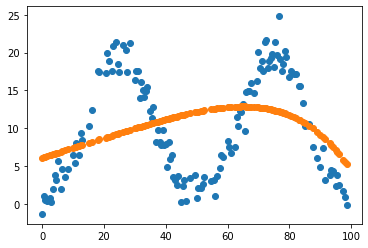

In [193]:
lasso_reg = LassoRegression(degree = 5, alpha = 0.1)
lasso_reg.fit(train_x.reshape(-1,1),train_y.reshape(-1,1))

plt.plot(train_x, train_y, "o")
plt.plot(train_x, lasso_reg.predict(train_x.reshape(-1, 1)), "o")
